# Crop recommendation system using Random forest model

## **Importing   Libraries**

In [1]:
import pandas as pd                                               
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib


## Read the dataset

In [2]:

df = pd.read_csv('crop.csv')

# Data Analysis

In [3]:
df.head()

,temperature,humidity,ph,water availability,season,soil type,label
0,20.879744,82.002744,6.502985,202.935536,rainy,red sandy,rice
1,21.770462,80.319644,7.038096,226.655537,rainy,red sandy,rice
2,23.004459,82.320763,7.840207,263.964248,rainy,red sandy,rice
3,26.491096,80.158363,6.980401,242.864034,rainy,red sandy,rice
4,20.130175,81.604873,7.628473,262.717340,rainy,red sandy,rice


In [4]:
df.tail()

,temperature,humidity,ph,water availability,season,soil type,label
995,23.052764,60.424786,7.011121,52.602853,rainy,red sandy,groundnut
996,21.658458,63.583371,6.280726,38.076594,rainy,red sandy,groundnut
997,26.250703,67.627797,7.621495,40.810630,rainy,red sandy,groundnut
998,20.971953,63.831799,7.630424,53.102079,rainy,red sandy,groundnut
999,23.897364,66.321020,7.802212,40.745368,rainy,red sandy,groundnut


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         1000 non-null   float64
 1   humidity            1000 non-null   float64
 2   ph                  1000 non-null   float64
 3   water availability  1000 non-null   float64
 4   season              1000 non-null   object 
 5   soil type           1000 non-null   object 
 6   label               1000 non-null   object 
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


In [6]:
df.size

7000

In [7]:
df.shape

(1000, 7)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,1000.0,24.316398,4.427686,15.330426,20.551976,24.384568,27.461034,36.977944
humidity,1000.0,59.404780,23.139566,14.258040,47.196828,65.301561,79.466018,89.996156
ph,1000.0,6.531501,0.745520,4.548202,5.959182,6.542661,7.054562,8.868741
water availability,1000.0,107.791241,61.104874,35.034848,64.174762,84.712438,150.266554,298.560117


In [9]:
df.columns

Index(['temperature', 'humidity', 'ph', 'water availability', 'season',
       'soil type', 'label'],
      dtype='object')

In [10]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'coconut', 'pigeonpeas', 'mungbean',
       'blackgram', 'ragi', 'groundnut'], dtype=object)

In [11]:
df.dtypes

temperature           float64
humidity              float64
ph                    float64
water availability    float64
season                 object
soil type              object
label                  object
dtype: object

In [12]:
df['label'].value_counts()

maize         200
rice          100
chickpea      100
coconut       100
pigeonpeas    100
mungbean      100
blackgram     100
ragi          100
groundnut     100
Name: label, dtype: int64

<AxesSubplot:>

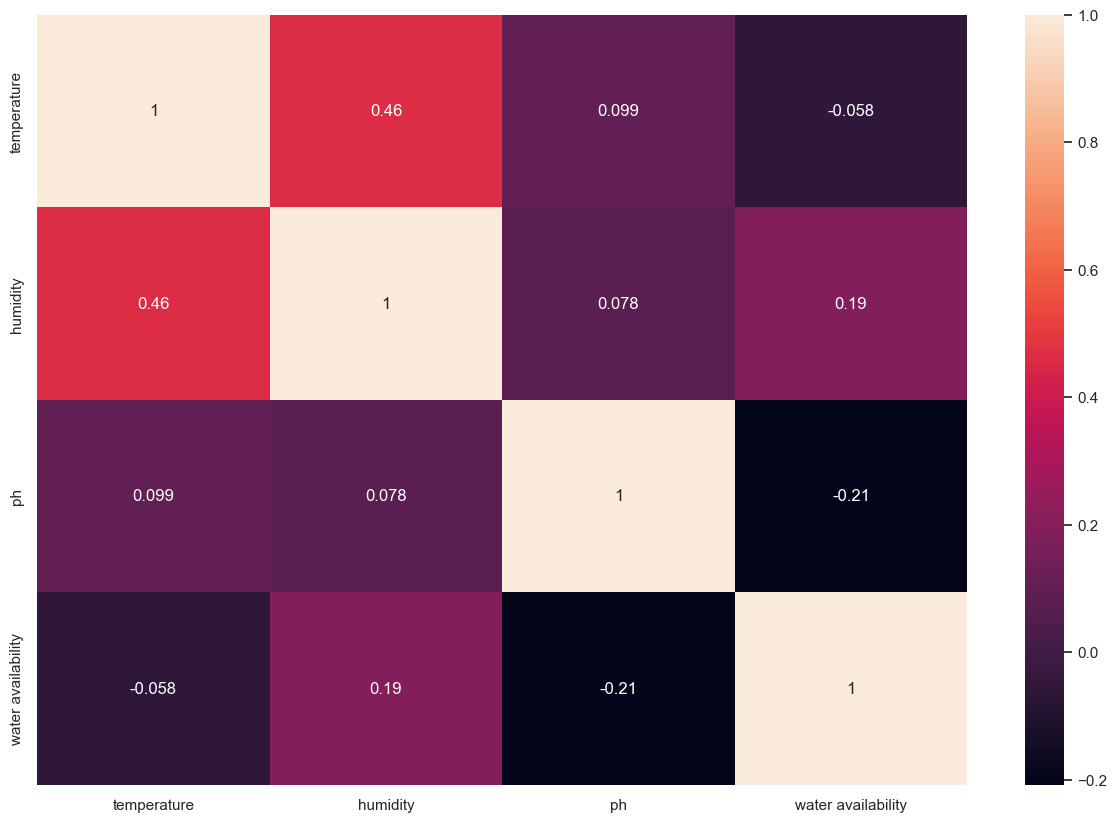

In [13]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(df.corr(),annot=True)

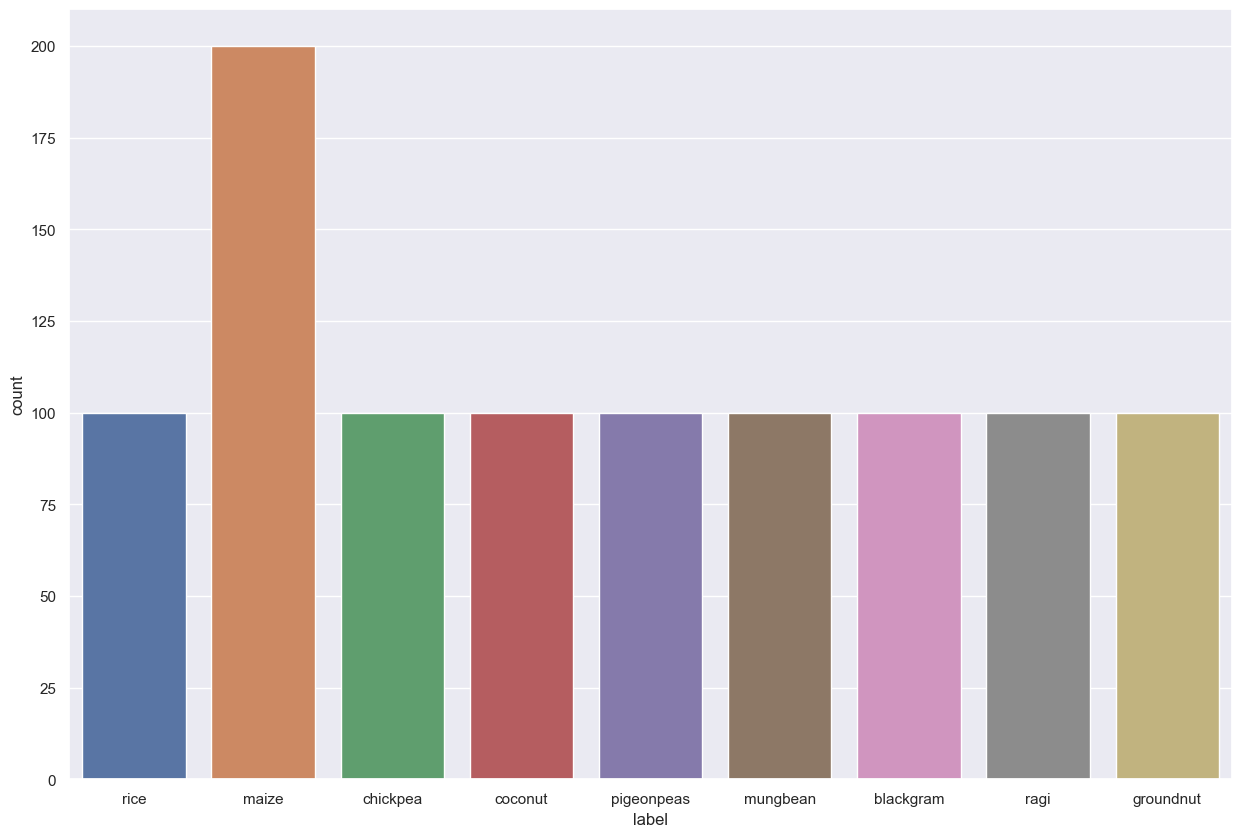

In [14]:
import matplotlib.pyplot as plt
sns.countplot(x=df['label'])
plt.show()

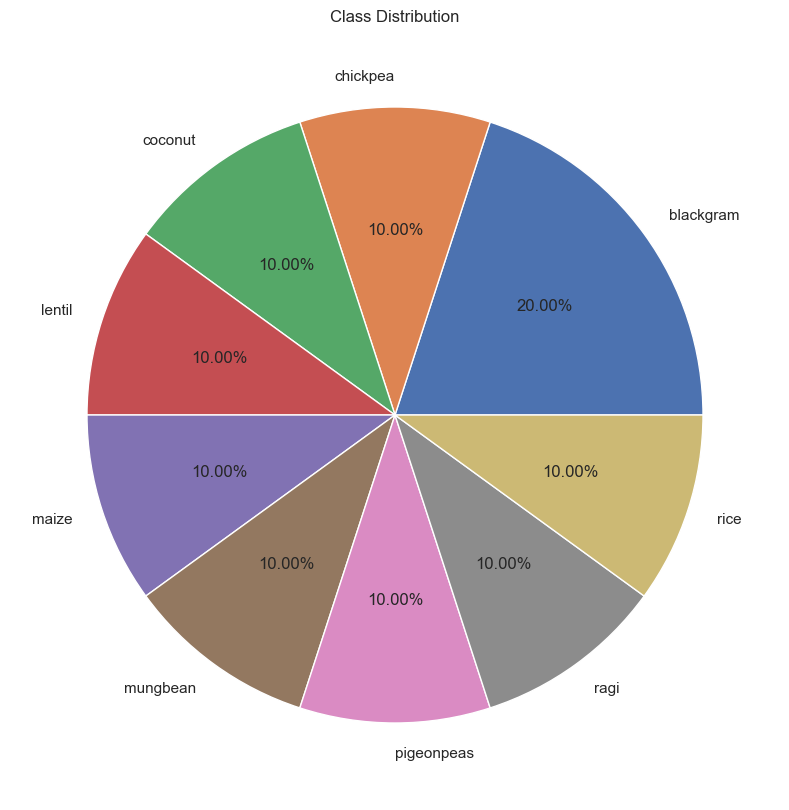

In [15]:
bel_mapping = {0: 'blackgram', 1: 'chickpea', 2: 'coconut', 3: 'lentil', 4: 'maize',
                 5: 'mungbean', 6: 'pigeonpeas', 7: 'ragi', 8: 'rice'}
plt.pie(
    df['label'].value_counts(),
    autopct='%.2f%%',
    labels=bel_mapping.values()
)

plt.title("Class Distribution")
plt.show()

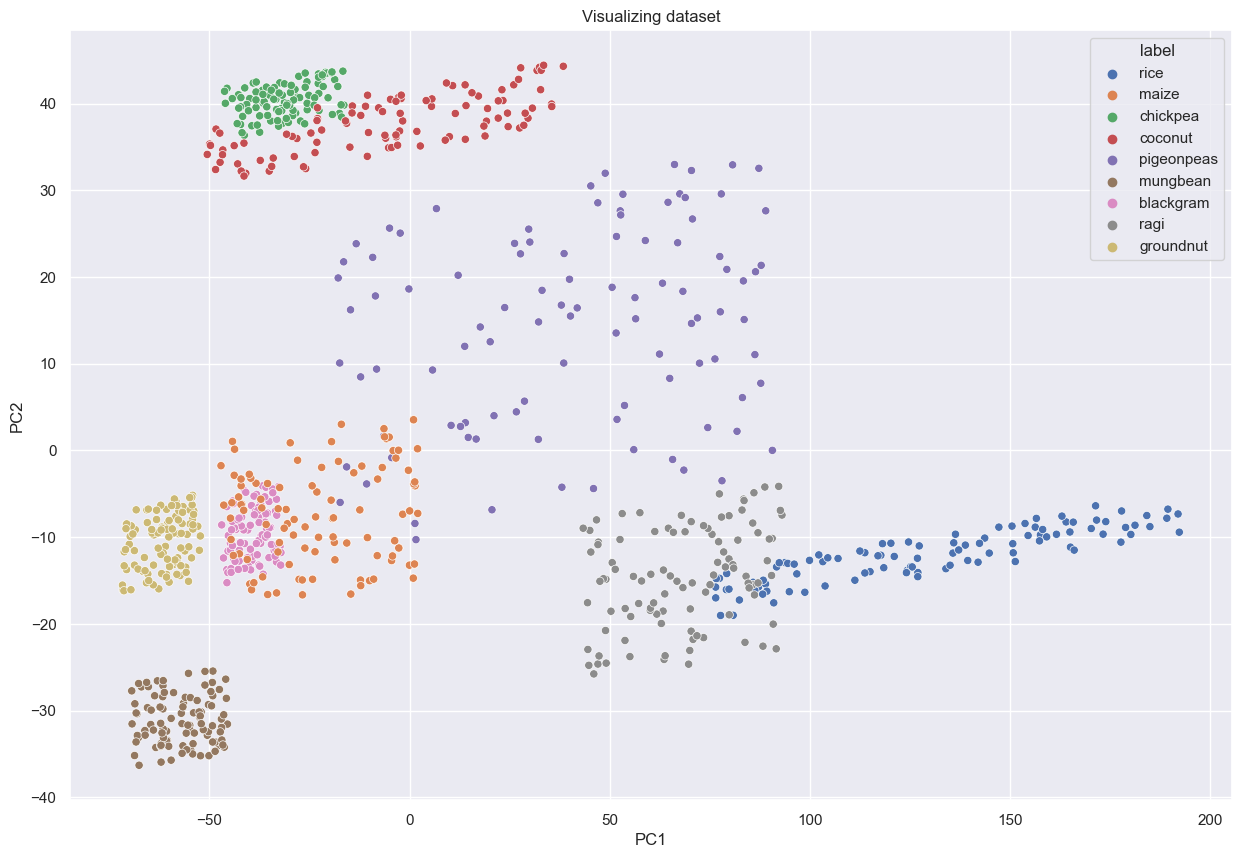

In [16]:
# visualizing dataset using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(df.iloc[:,:-3])
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],hue=df.iloc[:,-1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualizing dataset")
plt.show()

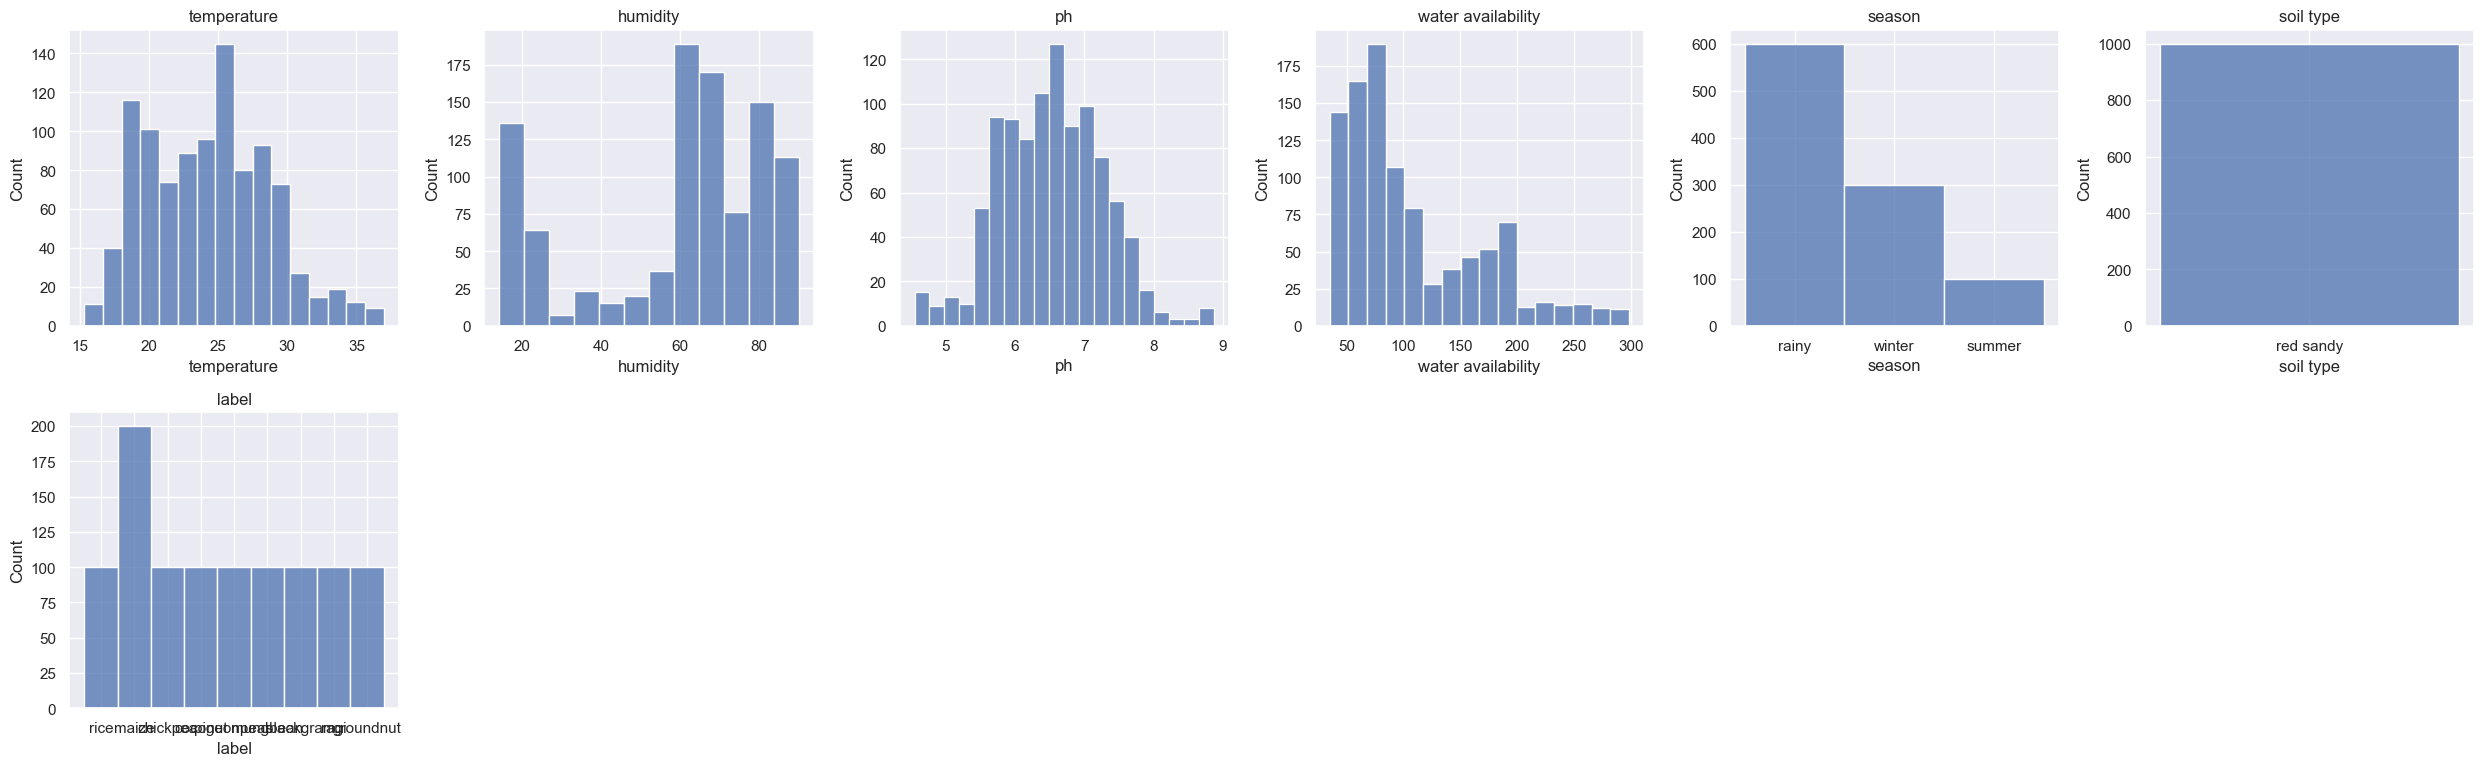

In [17]:
plt.figure(figsize=(25, 15))

for i, col in enumerate(df.columns):
    plt.subplot(4, 6, i+1)
    sns.histplot(data = df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## Define label encoders for categorical features

In [18]:
# Define label encoders for categorical features
label_encoders = {}
categorical_columns = ['season', 'soil type']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

## Save label encoders to a text file

In [19]:
# Save label encoders to a text file
with open('label_encoders.txt', 'w') as file:
    for col, le in label_encoders.items():
        file.write(f"{col}: {','.join(le.classes_)}\n")

In [20]:
df.head()

,temperature,humidity,ph,water availability,season,soil type,label
0,20.879744,82.002744,6.502985,202.935536,0,0,rice
1,21.770462,80.319644,7.038096,226.655537,0,0,rice
2,23.004459,82.320763,7.840207,263.964248,0,0,rice
3,26.491096,80.158363,6.980401,242.864034,0,0,rice
4,20.130175,81.604873,7.628473,262.717340,0,0,rice


In [21]:
df[200:210]

,temperature,humidity,ph,water availability,season,soil type,label
200,17.024985,16.988612,7.485996,88.551231,2,0,chickpea
201,19.020613,17.131591,6.920251,79.926981,2,0,chickpea
202,17.887765,15.405897,5.996932,68.549329,2,0,chickpea
203,18.868056,15.658092,6.391174,88.510490,2,0,chickpea
204,18.369526,19.563810,7.152811,79.263577,2,0,chickpea
205,20.450786,15.403121,5.988993,92.683737,2,0,chickpea
206,20.654320,16.608208,6.231049,74.663112,2,0,chickpea
207,17.334868,18.749270,7.550808,82.617347,2,0,chickpea
208,18.179123,18.904269,7.010571,81.849975,2,0,chickpea
209,18.012723,18.309681,8.753795,81.985688,2,0,chickpea


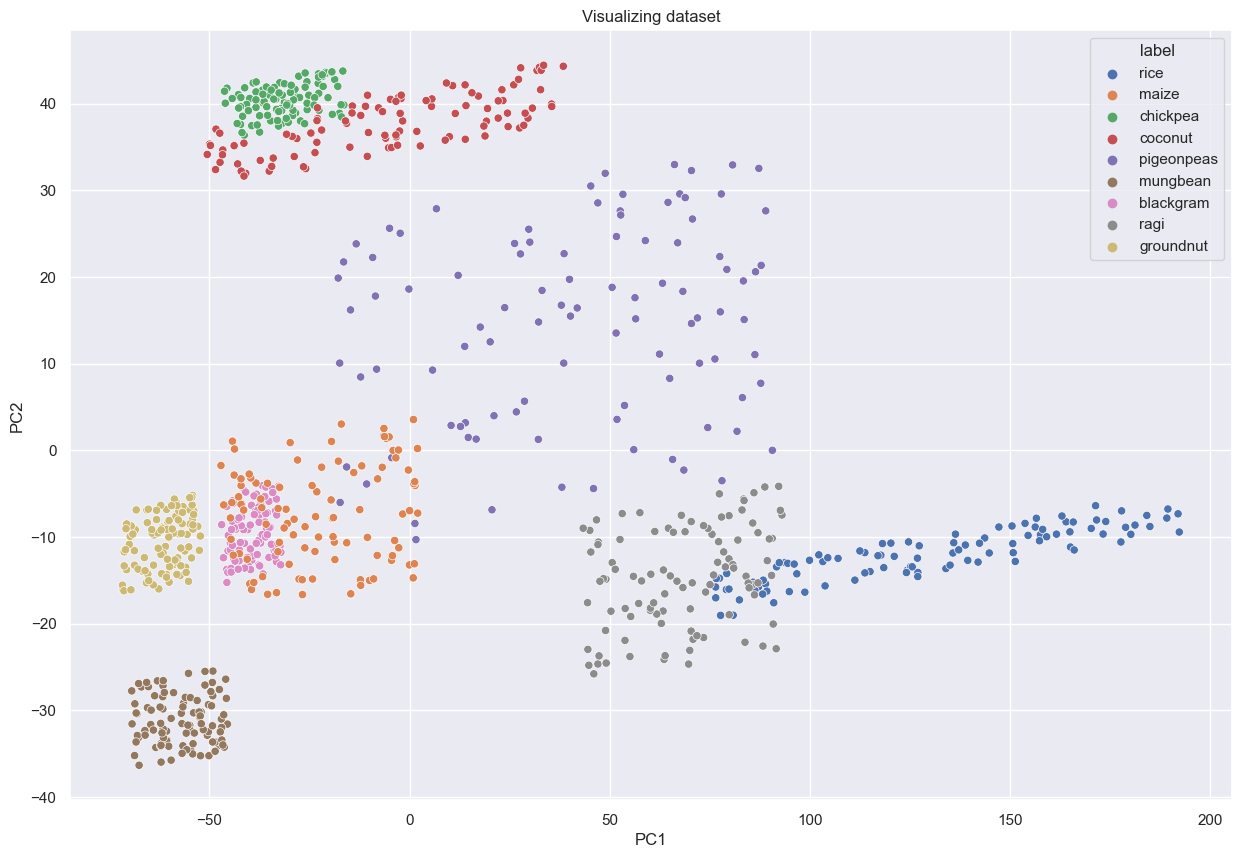

In [22]:
# visualizing dataset using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(df.iloc[:,:-1])
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],hue=df.iloc[:,-1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualizing dataset")
plt.show()

## Define mapping for label column

In [23]:
label_mapping = {
    'blackgram': 0,
    'chickpea': 1,
    'coconut': 2,
    'lentil': 3,
    'maize': 4,
    'mungbean': 5,
    'pigeonpeas': 6,
    'ragi': 7,
    'rice': 8
}


## Map label column to integer labels

In [24]:
df['label'] = df['label'].map(label_mapping)
df = df.dropna()

## Split features and target variable


In [25]:
X = df.drop('label', axis=1)
y = df['label']



## Split the data into training and testing sets


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [27]:
print(f"X_train : {X_train.shape} \nX_test  : {X_test.shape} \ny_train : {y_train.shape} \ny_test  : {y_test.shape} \n")

X_train : (720, 6) 
X_test  : (180, 6) 
y_train : (720,) 
y_test  : (180,) 



# RandomForestClassifier

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score



# Initialize individual classifiers
rf_classifier = RandomForestClassifier(random_state=42)



rf_classifier.fit(X_train, y_train)

y_pred=rf_classifier.predict(X_test)
print(len(y_pred))

x=round(accuracy_score(y_pred,y_test)*100,2)
print("Accuracy Score  :  {score_rf}")

y_pred = np.around(y_pred)
print(metrics.classification_report(y_test,y_pred))

print(metrics.confusion_matrix(y_test,y_pred))
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

180
Accuracy Score  :  {score_rf}
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      1.00      1.00        22
         2.0       1.00      1.00      1.00        22
         4.0       0.97      1.00      0.98        31
         5.0       1.00      1.00      1.00        23
         6.0       1.00      0.95      0.98        22
         7.0       0.89      0.89      0.89        19
         8.0       0.92      0.92      0.92        25

    accuracy                           0.97       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180

[[16  0  0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 0  0  0  0 23  0  0  0]
 [ 0  0  0  1  0 21  0  0]
 [ 0  0  0  0  0  0 17  2]
 [ 0  0  0  0  0  0  2 23]]
Precision: 0.9724
Recall: 0.9722
F1 Score: 0.9722


In [29]:
# Evaluate the model on the test set
print(f"Accuracy on the test set: {x:.2f}%")

# Save the trained model to a file
joblib.dump(rf_classifier, 'rfff.pkl')

Accuracy on the test set: 97.22%


['rfff.pkl']

In [30]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


fig_size = (40, 20)  # You can adjust this as needed
dpi = 300  # You can adjust this as needed

rf_classifier = RandomForestClassifier(n_estimators=20, random_state=42)
rf_classifier.fit(X_train, y_train)

# Plot each tree and save as separate image files
for i, estimator in enumerate(rf_classifier.estimators_):
    plt.figure(figsize=fig_size)
    plot_tree(estimator, filled=True, class_names=[str(label) for label in df['label'].unique()])
    plt.title(f'Decision Tree {i+1} with {20} estimators')
    plt.savefig(f'trees/decision_tree_{20}_estimators_{i}.png', dpi=dpi)
    plt.close()
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


# Testing

In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib
from warnings import filterwarnings
filterwarnings('ignore')


# Load the trained model from the file
loaded_model = joblib.load('rfff.pkl')

# Load the label encoders
with open('label_encoders.txt', 'r') as file:
    label_encoders = {}
    for line in file:
        col, classes = line.strip().split(': ')
        classes = classes.split(',')
        le = LabelEncoder()
        le.classes_ = classes
        label_encoders[col] = le

# Example: Predict crops for a new input
new_input = pd.DataFrame({
    'temperature': [17.33],
    'humidity': [18.74],
    'ph': [7.5],
    'water_availability': [82.61],
    'season': ['winter'],
    'soil type': ['red sandy']
})

# Encode categorical columns in the new input
for col, le in label_encoders.items():
    new_input[col] = le.transform(new_input[col])

# Use the loaded model to predict probabilities of each class
predicted_probabilities = loaded_model.predict_proba(new_input)

# Get the indices of the top two predicted classes
top_two_indices = predicted_probabilities.argsort()[0][-2:]

# Map the indices back to crop names using the label mapping
label_mapping = {0: 'blackgram', 1: 'chickpea', 2: 'coconut', 3: 'lentil', 4: 'maize',
                 5: 'mungbean', 6: 'pigeonpeas', 7: 'ragi', 8: 'rice'}
top_two_crops = [label_mapping[index] for index in top_two_indices]

print(f"Top two recommended crops: {top_two_crops}")


Top two recommended crops: ['ragi', 'chickpea']
